In [1]:
using NLsolve, Plots, Distributions, ProgressMeter, Statistics, StatsPlots

struct Calibration
    σ::Float64           # elasticity of relative demand with respect to price         
    γ::Vector{Float64}   # intensity in each good
    ϵ::Vector{Float64}   # elasticity of relative demand with respect to income in luxury good sector
end

cal = Calibration(
    0.5,                    # sigma=0.5 completementary goods
    [1/3, 1/3, 1/3],        #intensity
    [0.6, 1.0, 1.65],       #ELASTICITIES
)

ρ=(cal.σ-1)/cal.σ

-1.0

In [2]:
#NH Utility Function
function solvingNH(u, C::Vector{Float64}, p::Vector{Float64}; cal=cal)
    E=sum(p[i]*C[i] for i=1:length(C))
    out=1-sum(cal.γ[i]^(1/cal.σ)*(((p[i]/E)^(-cal.σ)*cal.γ[i])/u^((1-cal.σ)*cal.σ*cal.ϵ[i]))^ρ for i=1:length(C))
    return out
end

function NHUtility(C::Vector{Float64}, p::Vector{Float64} ;cal=cal,tol=1e-10,T=100)
    res = nlsolve(u->[solvingNH(u[1], C, p)], [1.0])
    #Utility level for given C endowment
    U=res.zero[1]

    #Wealth and Minimum expenditure for the utility at given endowment level
    E=sum(p[i]*C[i] for i=1:length(C))
    ExpNH=sum(cal.γ[i]*U^(cal.ϵ[i]*cal.σ*(1-cal.σ)) * (p[i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
    
    #Optimal Demand with income effect
    C1=cal.γ[1]*U^(cal.ϵ[1]*cal.σ*(1-cal.σ))  * (p[1]/E)^(-cal.σ)
    C2=cal.γ[2]*U^(cal.ϵ[2]*cal.σ*(1-cal.σ))  * (p[2]/E)^(-cal.σ)
    C3=cal.γ[3]*U^(cal.ϵ[3]*cal.σ*(1-cal.σ))  * (p[3]/E)^(-cal.σ)

    #Expenditure share with income effect
    ω_p=cal.γ[1]*U^(cal.ϵ[1]*cal.σ*(1-cal.σ))  * (p[1]/E)^(1-cal.σ)
    ω_n=cal.γ[2]*U^(cal.ϵ[2]*cal.σ*(1-cal.σ))  * (p[2]/E)^(1-cal.σ)
    ω_l=cal.γ[3]*U^(cal.ϵ[3]*cal.σ*(1-cal.σ))  * (p[3]/E)^(1-cal.σ)

    #Optimal update for demand
    C=[C1,C2,C3]
    ω=[ω_p, ω_n, ω_l]

    return [C1, C2, C3, U]#, U, E, ω]

end

NHUtility (generic function with 1 method)

## Environment

In this example, prices were first given at p=[4.0, 5.0, 10.0].

However, this price level does not clear the market, we have demand that takes over endowment level in our economy. Hence we update the price level such that non homothetic is exactly equal to the endowment level.

We set 3 sectors with 300 agents.

### Random endowments

- Lognormal for luxury products
- Normal distribution for Primary and Normal, higher quantity for primary quantity

In terms of aggregate quantity : $ Q_P>Q_N>Q_L$

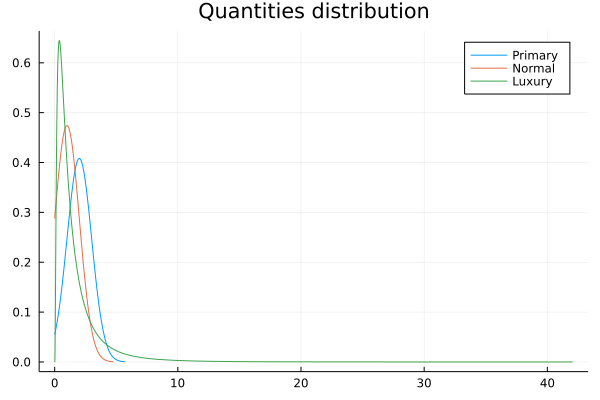

In [6]:
#Economy size
ng=3        #number of sector
na=300   #number of people
p=[4.0, 5.0, 10.0]

#Good matrix
G=zeros(na,ng)

#Quantities distribution for each person
D_P=Normal(2,1)
D_P = truncated(D_P, 0.0, Inf)
D_N=Normal(1,1)
D_N = truncated(D_N, 0.0, Inf)
D_L=LogNormal(0.02,1)
D_L = truncated(D_L, 0.0, Inf)


qdist=plot(D_P, title="Quantities distribution", label="Primary")
plot!(D_N, label="Normal")
plot!(D_L, label="Luxury")

savefig(qdist, "q_dist.png") # save the most recent fig as filename_string (such as "output.png")
qdist

In [7]:
#leading to a Expenditure vector evaluated by a distribution of good
p=[4.0, 5.0, 10.0]
Exp=[]

for j=1:na
    G[j,1]=rand(D_P)
    G[j,2]=rand(D_N)
    G[j,3]=rand(D_L)
end

G

300×3 Matrix{Float64}:
 2.05408   1.82426   0.543557
 2.27272   0.941542  0.170589
 2.83959   0.22131   0.655798
 2.81532   0.468572  1.18576
 1.76552   1.91014   0.767369
 2.8136    2.72258   0.655932
 3.54251   0.722171  0.601435
 0.294352  2.42158   0.128675
 0.38809   2.65996   1.88598
 2.46632   0.424702  0.471754
 ⋮                   
 1.43605   4.01414   0.416413
 1.95176   1.92289   1.14639
 2.59515   0.715689  1.22348
 3.96035   1.1597    7.10857
 2.14291   3.28383   0.769165
 2.55596   0.844183  0.587535
 1.73713   2.01656   2.02993
 1.55314   2.06327   0.411546
 1.46304   0.233796  1.40859

Progress:   0%|▏                                        |  ETA: 0:13:55

Progress:   4%|█▋                                       |  ETA: 0:02:20

Progress:   5%|██                                       |  ETA: 0:02:02

Progress:   5%|██▏                                      |  ETA: 0:01:55

Progress:   6%|██▎                                      |  ETA: 0:01:49

Progress:   6%|██▌                                      |  ETA: 0:01:44

Progress:   6%|██▋                                      |  ETA: 0:01:39

Progress:   7%|██▊                                      |  ETA: 0:01:35

Progress:   7%|███                                      |  ETA: 0:01:31

Progress:   8%|███▏                                     |  ETA: 0:01:28

Progress:   8%|███▎                                     |  ETA: 0:01:25

Progress:   8%|███▌                                     |  ETA: 0:01:22

Progress:   9%|███▋                                     |  ETA: 0:01:19

Progress:   9%|███▊                                     |  ETA: 0:01:17

Progress:  10%|███▉                                     |  ETA: 0:01:16

Progress:  10%|████▏                                    |  ETA: 0:01:14

Progress:  10%|████▎                                    |  ETA: 0:01:12

Progress:  11%|████▍                                    |  ETA: 0:01:10

Progress:  11%|████▋                                    |  ETA: 0:01:09

Progress:  12%|████▊                                    |  ETA: 0:01:07

Progress:  12%|████▉                                    |  ETA: 0:01:05

Progress:  12%|█████▏                                   |  ETA: 0:01:04

Progress:  13%|█████▍                                   |  ETA: 0:01:02

Progress:  13%|█████▌                                   |  ETA: 0:01:00

Progress:  14%|█████▋                                   |  ETA: 0:00:59

Progress:  14%|█████▉                                   |  ETA: 0:00:57

Progress:  15%|██████▏                                  |  ETA: 0:00:56

Progress:  15%|██████▎                                  |  ETA: 0:00:55

Progress:  16%|██████▍                                  |  ETA: 0:00:54

Progress:  16%|██████▌                                  |  ETA: 0:00:53

Progress:  16%|██████▊                                  |  ETA: 0:00:52

Progress:  17%|███████                                  |  ETA: 0:00:51

Progress:  17%|███████▏                                 |  ETA: 0:00:50

Progress:  18%|███████▎                                 |  ETA: 0:00:49

Progress:  18%|███████▌                                 |  ETA: 0:00:49

Progress:  19%|███████▋                                 |  ETA: 0:00:48

Progress:  19%|███████▊                                 |  ETA: 0:00:48

Progress:  19%|████████                                 |  ETA: 0:00:47

Progress:  20%|████████▏                                |  ETA: 0:00:46

Progress:  20%|████████▎                                |  ETA: 0:00:46

Progress:  21%|████████▌                                |  ETA: 0:00:45

Progress:  21%|████████▋                                |  ETA: 0:00:44

Progress:  21%|████████▊                                |  ETA: 0:00:44

Progress:  22%|█████████                                |  ETA: 0:00:43

Progress:  22%|█████████▏                               |  ETA: 0:00:43

Progress:  23%|█████████▎                               |  ETA: 0:00:42

Progress:  23%|█████████▍                               |  ETA: 0:00:41

Progress:  23%|█████████▋                               |  ETA: 0:00:41

Progress:  24%|█████████▊                               |  ETA: 0:00:41

Progress:  24%|█████████▉                               |  ETA: 0:00:40

Progress:  25%|██████████▏                              |  ETA: 0:00:40

Progress:  25%|██████████▎                              |  ETA: 0:00:39

Progress:  25%|██████████▍                              |  ETA: 0:00:39

Progress:  26%|██████████▋                              |  ETA: 0:00:38

Progress:  26%|██████████▊                              |  ETA: 0:00:38

Progress:  27%|██████████▉                              |  ETA: 0:00:38

Progress:  27%|███████████▏                             |  ETA: 0:00:37

Progress:  27%|███████████▎                             |  ETA: 0:00:37

Progress:  28%|███████████▍                             |  ETA: 0:00:37

Progress:  28%|███████████▌                             |  ETA: 0:00:36

Progress:  29%|███████████▊                             |  ETA: 0:00:36

Progress:  29%|███████████▉                             |  ETA: 0:00:35

Progress:  29%|████████████                             |  ETA: 0:00:35

Progress:  30%|████████████▎                            |  ETA: 0:00:35

Progress:  30%|████████████▍                            |  ETA: 0:00:34

Progress:  31%|████████████▌                            |  ETA: 0:00:34

Progress:  31%|████████████▊                            |  ETA: 0:00:33

Progress:  32%|█████████████                            |  ETA: 0:00:33

Progress:  32%|█████████████▏                           |  ETA: 0:00:32

Progress:  32%|█████████████▎                           |  ETA: 0:00:32

Progress:  33%|█████████████▌                           |  ETA: 0:00:32

Progress:  33%|█████████████▊                           |  ETA: 0:00:31

Progress:  34%|█████████████▉                           |  ETA: 0:00:31

Progress:  34%|██████████████                           |  ETA: 0:00:31

Progress:  35%|██████████████▏                          |  ETA: 0:00:31

Progress:  35%|██████████████▍                          |  ETA: 0:00:30

Progress:  36%|██████████████▋                          |  ETA: 0:00:30

Progress:  36%|██████████████▉                          |  ETA: 0:00:29

Progress:  37%|███████████████                          |  ETA: 0:00:29

Progress:  37%|███████████████▏                         |  ETA: 0:00:29

Progress:  37%|███████████████▍                         |  ETA: 0:00:28

Progress:  38%|███████████████▌                         |  ETA: 0:00:28

Progress:  38%|███████████████▋                         |  ETA: 0:00:28

Progress:  39%|███████████████▉                         |  ETA: 0:00:28

Progress:  39%|████████████████                         |  ETA: 0:00:27

Progress:  39%|████████████████▏                        |  ETA: 0:00:27

Progress:  40%|████████████████▍                        |  ETA: 0:00:27

Progress:  40%|████████████████▌                        |  ETA: 0:00:27

Progress:  41%|████████████████▋                        |  ETA: 0:00:26

Progress:  41%|████████████████▊                        |  ETA: 0:00:26

Progress:  41%|█████████████████                        |  ETA: 0:00:26

Progress:  42%|█████████████████▏                       |  ETA: 0:00:25

Progress:  42%|█████████████████▎                       |  ETA: 0:00:25

Progress:  43%|█████████████████▌                       |  ETA: 0:00:25

Progress:  43%|█████████████████▋                       |  ETA: 0:00:25

Progress:  43%|█████████████████▊                       |  ETA: 0:00:25

Progress:  44%|██████████████████                       |  ETA: 0:00:24

Progress:  44%|██████████████████▏                      |  ETA: 0:00:24

Progress:  45%|██████████████████▎                      |  ETA: 0:00:24

Progress:  45%|██████████████████▌                      |  ETA: 0:00:24

Progress:  45%|██████████████████▋                      |  ETA: 0:00:23

Progress:  46%|██████████████████▊                      |  ETA: 0:00:23

Progress:  46%|███████████████████                      |  ETA: 0:00:23

Progress:  47%|███████████████████▏                     |  ETA: 0:00:23

Progress:  47%|███████████████████▎                     |  ETA: 0:00:23

Progress:  47%|███████████████████▍                     |  ETA: 0:00:22

Progress:  48%|███████████████████▋                     |  ETA: 0:00:22

Progress:  48%|███████████████████▊                     |  ETA: 0:00:22

Progress:  49%|███████████████████▉                     |  ETA: 0:00:22

Progress:  49%|████████████████████▏                    |  ETA: 0:00:21

Progress:  49%|████████████████████▎                    |  ETA: 0:00:21

Progress:  50%|████████████████████▍                    |  ETA: 0:00:21

Progress:  50%|████████████████████▋                    |  ETA: 0:00:21

Progress:  51%|████████████████████▊                    |  ETA: 0:00:21

Progress:  51%|████████████████████▉                    |  ETA: 0:00:20

Progress:  51%|█████████████████████                    |  ETA: 0:00:21

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:20

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:20

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:20

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:20

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:20

Progress:  54%|██████████████████████                   |  ETA: 0:00:19

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:19

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:19

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:19

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:19

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:18

Progress:  56%|███████████████████████                  |  ETA: 0:00:18

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:18

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:18

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:18

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:18

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:17

Progress:  58%|████████████████████████                 |  ETA: 0:00:17

Progress:  59%|████████████████████████▏                |  ETA: 0:00:17

Progress:  59%|████████████████████████▎                |  ETA: 0:00:17

Progress:  60%|████████████████████████▍                |  ETA: 0:00:17

Progress:  60%|████████████████████████▋                |  ETA: 0:00:16

Progress:  61%|████████████████████████▉                |  ETA: 0:00:16

Progress:  61%|█████████████████████████                |  ETA: 0:00:16

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:16

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:16

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:15

Progress:  63%|█████████████████████████▋               |  ETA: 0:00:15

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:15

Progress:  63%|██████████████████████████               |  ETA: 0:00:15

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:15

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:14

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:14

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:14

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:14

Progress:  66%|███████████████████████████              |  ETA: 0:00:14

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:13

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:13

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:13

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:13

Progress:  68%|████████████████████████████             |  ETA: 0:00:13

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:12

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:12

Progress:  70%|████████████████████████████▌            |  ETA: 0:00:12

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:12

Progress:  71%|█████████████████████████████            |  ETA: 0:00:11

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:11

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:11

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:11

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:11

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:10

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:10

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:10

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:10

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:10

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:09

Progress:  76%|███████████████████████████████          |  ETA: 0:00:09

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:09

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:09

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:09

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:09

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:08

Progress:  78%|████████████████████████████████         |  ETA: 0:00:08

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:08

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:08

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:08

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:07

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:07

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:07

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:07

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:07

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:06

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:06

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:05

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:05

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:05

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:05

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:05

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:05

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:04

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:04

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:04

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:04

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:04

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:03

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▌   |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:03

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:03

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:02

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:02

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:02

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:01

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:01

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35


(W, D, Excess, p) = ([611.7973784191961, 398.27092016672066, 466.5083677496227], [611.7973784249216, 398.27092112933155, 466.50836673267185], [5.7254965213360265e-9, 9.62610897659033e-7, -1.0169508755097922e-6], [1.3941986991796433, 5.656385622940437, 10.361859383397466])


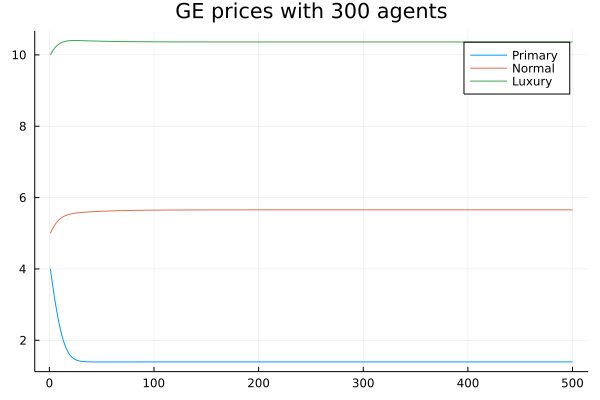

In [8]:
#Initial price level given
p=[4.0, 5.0, 10.0]

#Vectors and matrixes to store
W=zeros(ng)             #Endowment
D=zeros(ng)             #NH Demand
Excess=zeros(ng)

#We are looking for a pricepath at the GE.
pricepath=[]
#First value for excess, 
#1. if D>W Price increases
#2. if D<W Price drops
for i=1:ng
    W[i]=sum(G[j,i] for j=1:na)
    D[i]=sum(NHUtility(G[j,:],p)[i] for j=1:na)
end

Excess=D-W

@showprogress for j=1:500
    pricepath=push!(pricepath, [p[1], p[2], p[3]])
    for i=1:ng
        p[i]=p[i]+0.001*Excess[i]
        W[i]=sum(G[j,i] for j=1:na)
        D[i]=sum(NHUtility(G[j,:],p)[i] for j=1:na)        
    end
    Excess=D-W
sleep(0.000000001)
end

initial_p=[p[1], p[2], p[3]]

@show W,D, Excess, p

pricep=pricepath
p_p=[]
p_n=[]
p_l=[]
for i=1:length(pricep)
    p_p=push!(p_p, pricep[i][1])
    p_n=push!(p_n, pricep[i][2])
    p_l=push!(p_l, pricep[i][3])
end

plot([p_p p_n p_l], title="GE prices with 300 agents", label=["Primary" "Normal" "Luxury"])

Suppose we know design a supply shock where a fifth of the Primary good aggregate quantity destroyed.

In [71]:
Exp=[]
for a = 1:Int(length(G)/ng)
    E=sum(initial_p[i]*G[a,i] for i = 1:ng)
    Exp=push!(Exp,E)
end

initial=[G Exp]
initial=sortslices(initial,dims=1,by=x->(x[4]),rev=false)
G=convert(Matrix{Float64},initial[:,[1,2,3]])

#after shock endowment level
n_G=copy(G)
s_shock=1/5
n_G[:,1]=G[:,1].*(1-s_shock)
n_G

300×3 Matrix{Float64}:
 0.97633    0.0545574   0.273383
 0.528768   0.377906    0.196581
 0.998516   0.347992    0.16045
 1.49488    0.228383    0.207302
 0.964337   0.340603    0.268488
 1.22921    0.603143    0.0982747
 0.0909184  0.89139     0.121826
 0.699593   0.315647    0.392908
 1.65779    0.014151    0.425135
 0.151407   0.759608    0.290711
 ⋮                     
 0.30688    0.74696     6.89196
 0.292687   0.254988    7.26682
 2.66144    1.67849     6.23789
 2.03205    3.07733     5.74762
 3.01688    1.12675     8.08534
 1.8496     1.8296      9.00468
 1.53289    1.80157    16.0175
 2.98192    0.517213   23.4368
 1.74505    2.03982    25.459

Then continue to look for equilibrium at GE prices to find another GE with supply shock.

In [72]:
shockpricepath=pricepath
initial_p=[p[1], p[2], p[3]]
@showprogress for j=1:500
    shockpricepath=push!(shockpricepath, [p[1], p[2], p[3]])
    for i=1:ng
        p[i]=p[i]+0.001*Excess[i]
        W[i]=sum(n_G[j,i] for j=1:na)
        D[i]=sum(NHUtility(n_G[j,:],p)[i] for j=1:na)        
    end
    Excess=D-W
sleep(0.00000001)
end

after_shock_p=p

pricep=shockpricepath
p_p=[]
p_n=[]
p_l=[]
for i=1:length(pricep)
    p_p=push!(p_p, pricep[i][1])
    p_n=push!(p_n, pricep[i][2])
    p_l=push!(p_l, pricep[i][3])
end

@show W,D, Excess
pge=plot([p_p p_n p_l], title="GE prices with 300 agents", label=["Primary" "Normal" "Luxury"])
savefig(pge, "ge_prices.png") # save the most recent fig as filename_string (such as "output.png")

Progress:   0%|▏                                        |  ETA: 0:03:54

Progress:   1%|▎                                        |  ETA: 0:03:05

Progress:   1%|▍                                        |  ETA: 0:02:17

Progress:   1%|▋                                        |  ETA: 0:01:56

Progress:   2%|▊                                        |  ETA: 0:01:38

Progress:   2%|▉                                        |  ETA: 0:01:37

Progress:   2%|▉                                        |  ETA: 0:01:33

Progress:   2%|█                                        |  ETA: 0:01:29

Progress:   3%|█▏                                       |  ETA: 0:01:24

Progress:   3%|█▎                                       |  ETA: 0:01:23

Progress:   3%|█▎                                       |  ETA: 0:01:21

Progress:   4%|█▌                                       |  ETA: 0:01:19

Progress:   4%|█▋                                       |  ETA: 0:01:15

Progress:   4%|█▊                                       |  ETA: 0:01:12

Progress:   5%|██                                       |  ETA: 0:01:10

Progress:   5%|██▏                                      |  ETA: 0:01:07

Progress:   6%|██▎                                      |  ETA: 0:01:05

Progress:   6%|██▌                                      |  ETA: 0:01:03

Progress:   6%|██▋                                      |  ETA: 0:01:01

Progress:   7%|██▊                                      |  ETA: 0:00:59

Progress:   7%|███                                      |  ETA: 0:00:59

Progress:   8%|███▏                                     |  ETA: 0:00:57

Progress:   8%|███▎                                     |  ETA: 0:00:58

Progress:   8%|███▌                                     |  ETA: 0:00:56

Progress:   9%|███▌                                     |  ETA: 0:00:56

Progress:   9%|███▊                                     |  ETA: 0:00:55

Progress:   9%|███▉                                     |  ETA: 0:00:54

Progress:  10%|████                                     |  ETA: 0:00:54

Progress:  10%|████▏                                    |  ETA: 0:00:54

Progress:  11%|████▍                                    |  ETA: 0:00:53

Progress:  11%|████▌                                    |  ETA: 0:00:54

Progress:  11%|████▋                                    |  ETA: 0:00:53

Progress:  12%|████▉                                    |  ETA: 0:00:53

Progress:  12%|█████                                    |  ETA: 0:00:53

Progress:  12%|█████▏                                   |  ETA: 0:00:53

Progress:  13%|█████▏                                   |  ETA: 0:00:54

Progress:  13%|█████▎                                   |  ETA: 0:00:54

Progress:  13%|█████▍                                   |  ETA: 0:00:54

Progress:  13%|█████▍                                   |  ETA: 0:00:53

Progress:  13%|█████▌                                   |  ETA: 0:00:55

Progress:  14%|█████▋                                   |  ETA: 0:00:56

Progress:  14%|█████▋                                   |  ETA: 0:00:56

Progress:  14%|█████▊                                   |  ETA: 0:00:56

Progress:  14%|█████▉                                   |  ETA: 0:00:56

Progress:  14%|█████▉                                   |  ETA: 0:00:56

Progress:  15%|██████▏                                  |  ETA: 0:00:55

Progress:  15%|██████▏                                  |  ETA: 0:00:55

Progress:  15%|██████▍                                  |  ETA: 0:00:54

Progress:  16%|██████▍                                  |  ETA: 0:00:54

Progress:  16%|██████▌                                  |  ETA: 0:00:55

Progress:  16%|██████▌                                  |  ETA: 0:00:55

Progress:  16%|██████▊                                  |  ETA: 0:00:54

Progress:  17%|██████▊                                  |  ETA: 0:00:54

Progress:  17%|███████                                  |  ETA: 0:00:54

Progress:  17%|███████▏                                 |  ETA: 0:00:53

Progress:  18%|███████▎                                 |  ETA: 0:00:52

Progress:  18%|███████▌                                 |  ETA: 0:00:52

Progress:  19%|███████▋                                 |  ETA: 0:00:51

Progress:  19%|███████▊                                 |  ETA: 0:00:51

Progress:  19%|████████                                 |  ETA: 0:00:50

Progress:  20%|████████▏                                |  ETA: 0:00:49

Progress:  20%|████████▎                                |  ETA: 0:00:49

Progress:  21%|████████▌                                |  ETA: 0:00:48

Progress:  21%|████████▋                                |  ETA: 0:00:48

Progress:  21%|████████▊                                |  ETA: 0:00:47

Progress:  22%|█████████                                |  ETA: 0:00:47

Progress:  22%|█████████▏                               |  ETA: 0:00:46

Progress:  23%|█████████▎                               |  ETA: 0:00:46

Progress:  23%|█████████▍                               |  ETA: 0:00:46

Progress:  23%|█████████▍                               |  ETA: 0:00:46

Progress:  23%|█████████▌                               |  ETA: 0:00:46

Progress:  23%|█████████▋                               |  ETA: 0:00:46

Progress:  24%|█████████▋                               |  ETA: 0:00:46

Progress:  24%|█████████▊                               |  ETA: 0:00:47

Progress:  24%|█████████▉                               |  ETA: 0:00:47

Progress:  24%|█████████▉                               |  ETA: 0:00:47

Progress:  24%|██████████                               |  ETA: 0:00:47

Progress:  25%|██████████▏                              |  ETA: 0:00:47

Progress:  25%|██████████▏                              |  ETA: 0:00:47

Progress:  25%|██████████▎                              |  ETA: 0:00:48

Progress:  25%|██████████▍                              |  ETA: 0:00:48

Progress:  25%|██████████▍                              |  ETA: 0:00:48

Progress:  26%|██████████▌                              |  ETA: 0:00:48

Progress:  26%|██████████▋                              |  ETA: 0:00:48

Progress:  26%|██████████▋                              |  ETA: 0:00:48

Progress:  26%|██████████▊                              |  ETA: 0:00:48

Progress:  26%|██████████▉                              |  ETA: 0:00:48

Progress:  27%|██████████▉                              |  ETA: 0:00:48

Progress:  27%|███████████▏                             |  ETA: 0:00:47

Progress:  27%|███████████▎                             |  ETA: 0:00:47

Progress:  28%|███████████▍                             |  ETA: 0:00:46

Progress:  28%|███████████▌                             |  ETA: 0:00:46

Progress:  29%|███████████▊                             |  ETA: 0:00:46

Progress:  29%|███████████▉                             |  ETA: 0:00:45

Progress:  29%|████████████                             |  ETA: 0:00:45

Progress:  30%|████████████▎                            |  ETA: 0:00:44

Progress:  30%|████████████▍                            |  ETA: 0:00:44

Progress:  31%|████████████▌                            |  ETA: 0:00:43

Progress:  31%|████████████▊                            |  ETA: 0:00:43

Progress:  31%|████████████▉                            |  ETA: 0:00:43

Progress:  32%|█████████████                            |  ETA: 0:00:42

Progress:  32%|█████████████▎                           |  ETA: 0:00:42

Progress:  33%|█████████████▍                           |  ETA: 0:00:42

Progress:  33%|█████████████▌                           |  ETA: 0:00:41

Progress:  33%|█████████████▊                           |  ETA: 0:00:41

Progress:  34%|█████████████▊                           |  ETA: 0:00:41

Progress:  34%|██████████████                           |  ETA: 0:00:40

Progress:  34%|██████████████▏                          |  ETA: 0:00:40

Progress:  35%|██████████████▎                          |  ETA: 0:00:40

Progress:  35%|██████████████▍                          |  ETA: 0:00:39

Progress:  36%|██████████████▋                          |  ETA: 0:00:39

Progress:  36%|██████████████▊                          |  ETA: 0:00:39

Progress:  36%|██████████████▉                          |  ETA: 0:00:38

Progress:  37%|███████████████▏                         |  ETA: 0:00:38

Progress:  37%|███████████████▎                         |  ETA: 0:00:38

Progress:  37%|███████████████▍                         |  ETA: 0:00:38

Progress:  38%|███████████████▍                         |  ETA: 0:00:38

Progress:  38%|███████████████▋                         |  ETA: 0:00:37

Progress:  38%|███████████████▋                         |  ETA: 0:00:37

Progress:  38%|███████████████▊                         |  ETA: 0:00:37

Progress:  39%|███████████████▉                         |  ETA: 0:00:37

Progress:  39%|███████████████▉                         |  ETA: 0:00:37

Progress:  39%|████████████████                         |  ETA: 0:00:37

Progress:  39%|████████████████▏                        |  ETA: 0:00:37

Progress:  39%|████████████████▏                        |  ETA: 0:00:38

Progress:  40%|████████████████▎                        |  ETA: 0:00:38

Progress:  40%|████████████████▍                        |  ETA: 0:00:37

Progress:  40%|████████████████▋                        |  ETA: 0:00:37

Progress:  41%|████████████████▊                        |  ETA: 0:00:37

Progress:  41%|████████████████▉                        |  ETA: 0:00:36

Progress:  42%|█████████████████                        |  ETA: 0:00:36

Progress:  42%|█████████████████▎                       |  ETA: 0:00:36

Progress:  42%|█████████████████▍                       |  ETA: 0:00:36

Progress:  43%|█████████████████▌                       |  ETA: 0:00:35

Progress:  43%|█████████████████▊                       |  ETA: 0:00:35

Progress:  44%|█████████████████▉                       |  ETA: 0:00:34

Progress:  44%|██████████████████                       |  ETA: 0:00:34

Progress:  44%|██████████████████▎                      |  ETA: 0:00:34

Progress:  45%|██████████████████▍                      |  ETA: 0:00:33

Progress:  45%|██████████████████▌                      |  ETA: 0:00:33

Progress:  46%|██████████████████▊                      |  ETA: 0:00:33

Progress:  46%|██████████████████▉                      |  ETA: 0:00:33

Progress:  46%|███████████████████                      |  ETA: 0:00:32

Progress:  47%|███████████████████▎                     |  ETA: 0:00:32

Progress:  47%|███████████████████▍                     |  ETA: 0:00:32

Progress:  48%|███████████████████▌                     |  ETA: 0:00:31

Progress:  48%|███████████████████▋                     |  ETA: 0:00:31

Progress:  48%|███████████████████▉                     |  ETA: 0:00:31

Progress:  49%|████████████████████                     |  ETA: 0:00:30

Progress:  49%|████████████████████▏                    |  ETA: 0:00:30

Progress:  49%|████████████████████▎                    |  ETA: 0:00:30

Progress:  50%|████████████████████▍                    |  ETA: 0:00:30

Progress:  50%|████████████████████▌                    |  ETA: 0:00:30

Progress:  50%|████████████████████▋                    |  ETA: 0:00:30

Progress:  50%|████████████████████▋                    |  ETA: 0:00:30

Progress:  51%|████████████████████▊                    |  ETA: 0:00:30

Progress:  51%|████████████████████▉                    |  ETA: 0:00:30

Progress:  51%|████████████████████▉                    |  ETA: 0:00:30

Progress:  51%|█████████████████████                    |  ETA: 0:00:30

Progress:  51%|█████████████████████▏                   |  ETA: 0:00:30

Progress:  52%|█████████████████████▏                   |  ETA: 0:00:30

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:29

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:29

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:29

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:29

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:29

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:29

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:29

Progress:  54%|██████████████████████                   |  ETA: 0:00:29

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:28

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:28

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:28

Progress:  55%|██████████████████████▋                  |  ETA: 0:00:27

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:27

Progress:  56%|███████████████████████                  |  ETA: 0:00:27

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:26

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:26

Progress:  57%|███████████████████████▎                 |  ETA: 0:00:26

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:26

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:26

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:26

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:25

Progress:  59%|████████████████████████                 |  ETA: 0:00:25

Progress:  59%|████████████████████████▎                |  ETA: 0:00:25

Progress:  59%|████████████████████████▍                |  ETA: 0:00:24

Progress:  60%|████████████████████████▌                |  ETA: 0:00:24

Progress:  60%|████████████████████████▋                |  ETA: 0:00:24

Progress:  61%|████████████████████████▉                |  ETA: 0:00:24

Progress:  61%|█████████████████████████                |  ETA: 0:00:23

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:23

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:23

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:23

Progress:  63%|█████████████████████████▋               |  ETA: 0:00:22

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:22

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:22

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:22

Progress:  63%|██████████████████████████               |  ETA: 0:00:22

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:22

Progress:  64%|██████████████████████████▏              |  ETA: 0:00:22

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:22

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:22

Progress:  65%|██████████████████████████▌              |  ETA: 0:00:22

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:22

Progress:  65%|██████████████████████████▉              |  ETA: 0:00:21

Progress:  66%|██████████████████████████▉              |  ETA: 0:00:21

Progress:  66%|███████████████████████████              |  ETA: 0:00:21

Progress:  66%|███████████████████████████              |  ETA: 0:00:21

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:21

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:21

Progress:  67%|███████████████████████████▎             |  ETA: 0:00:21

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:21

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:20

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:20

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:20

Progress:  68%|███████████████████████████▊             |  ETA: 0:00:20

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:20

Progress:  68%|████████████████████████████             |  ETA: 0:00:20

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:19

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:19

Progress:  69%|████████████████████████████▌            |  ETA: 0:00:19

Progress:  70%|████████████████████████████▋            |  ETA: 0:00:19

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:18

Progress:  71%|█████████████████████████████            |  ETA: 0:00:18

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:18

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:18

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:17

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:17

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:16

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:16

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:16

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:16

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:16

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:16

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:15

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:15

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:15

Progress:  76%|███████████████████████████████          |  ETA: 0:00:15

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:15

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:15

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:15

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:15

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:15

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:15

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:15

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:14

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:14

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:14

Progress:  78%|████████████████████████████████         |  ETA: 0:00:14

Progress:  78%|████████████████████████████████         |  ETA: 0:00:14

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:14

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:14

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:14

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:13

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:13

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:13

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:13

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:13

Progress:  81%|█████████████████████████████████        |  ETA: 0:00:12

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:12

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:12

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:11

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:11

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:11

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:11

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:11

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:10

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▋      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:10

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:09

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:09

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:09

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:08

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:08

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:08

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:08

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:08

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:08

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:08

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:07

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:07

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:07

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06

Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:06

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06

Progress:  92%|█████████████████████████████████████▌   |  ETA: 0:00:05

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:05

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:05

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:05

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:04

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:04

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:04

Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:04

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:03

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:03

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:03

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:03

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▍|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


(W, D, Excess) = ([491.09605931232426, 383.22024874178675, 498.0427313582707], [491.0960593502902, 383.22025119393476, 498.04272907300816], [3.7965946830809116e-8, 2.4521480099792825e-6, -2.2852625534142135e-6])


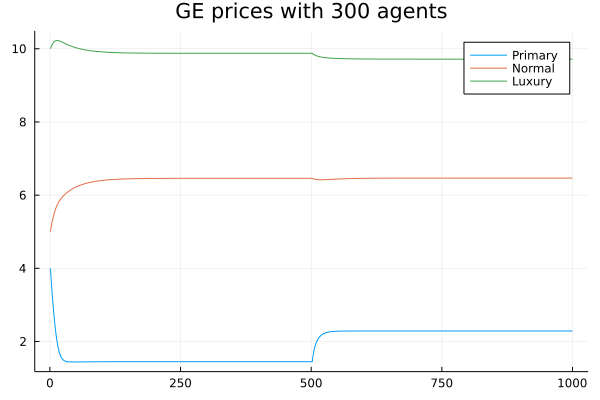

In [73]:
pge

In [74]:
initial_p, after_shock_p,p

([1.4489403835227557, 6.460733497555833, 9.875670163724923], [2.288418525859007, 6.465848326210855, 9.716095704682134], [2.288418525859007, 6.465848326210855, 9.716095704682134])

In [75]:
A=[]
B=[]

Exp=[]
C_P=[]
C_N=[]
C_L=[]
U=[]
#Deciles
for j=1:10
    for i=1:na/10
        A=push!(A,Int(i))
        B=push!(B,Int(j))
    end
end

#Initial endowment with GE prices

for a = 1:Int(length(G)/ng)
    E=sum(initial_p[i]*G[a,i] for i = 1:ng)
    C1=NHUtility(G[a,:],initial_p)[1]
    C2=NHUtility(G[a,:],initial_p)[2]
    C3=NHUtility(G[a,:],initial_p)[3]
    Utility=NHUtility(G[a,:],initial_p)[4]

    
    Exp=push!(Exp,E)
    C_P=push!(C_P,C1)
    C_N=push!(C_N,C2)
    C_L=push!(C_L,C3)
    U=push!(U,Utility)
end
#initial=sortslices(initial,dims=1,by=x->(x[1]),rev=false)

initial= [A U G Exp C_P C_N C_L]

300×9 Matrix{Any}:
  1    0.863966  1.22041   0.0545574  …   0.594812  0.277596   0.219256
  2    1.02138   0.66096   0.377906       0.641989  0.304671   0.247276
  3    1.11658   1.24814   0.347992       0.668694  0.320185   0.263658
  4    1.31143   1.8686    0.228383       0.719893  0.350289   0.296086
  5    1.43874   1.20542   0.340603       0.751238  0.368944   0.316585
  6    1.61609   1.53651   0.603143   …   0.792604  0.39381    0.344366
  7    1.62825   0.113648  0.89139        0.795352  0.395472   0.346241
  8    1.65021   0.874491  0.315647       0.80029   0.398461   0.349618
  9    1.68933   2.07224   0.014151       0.808999  0.403742   0.355603
 10    1.97933   0.189259  0.759608       0.870573  0.441409   0.398918
  ⋮                                   ⋱                       
 22   56.1244    0.3836    0.74696        4.34216   3.07613    4.7874
 23   56.6749    0.365858  0.254988       4.36323   3.09408    4.82298
 24   60.3907    3.3268    1.67849        4.50297   3.213

In [76]:
#After the shock, endowment with GE prices
C_P=[]
C_N=[]
C_L=[]
U=[]
Exp_ng=[]
for a = 1:Int(length(n_G)/ng)
    E=sum(initial_p[i]*n_G[a,i] for i = 1:ng)
    C1=NHUtility(n_G[a,:],initial_p)[1]
    C2=NHUtility(n_G[a,:],initial_p)[2]
    C3=NHUtility(n_G[a,:],initial_p)[3]
    Utility=NHUtility(n_G[a,:],initial_p)[4]

    Exp_ng=push!(Exp_ng,E)
    C_P=push!(C_P,C1)
    C_N=push!(C_N,C2)
    C_L=push!(C_L,C3)
    U=push!(U,Utility)
end
after_shock=[A U n_G Exp_ng C_P C_N C_L]

300×9 Matrix{Any}:
  1    0.762343  0.97633    0.0545574  …   0.56193   0.258989   0.200442
  2    0.962319  0.528768   0.377906       0.624764  0.294735   0.236908
  3    1.00244   0.998516   0.347992       0.636523  0.301512   0.243969
  4    1.13186   1.49488    0.228383       0.67287   0.322623   0.266253
  5    1.31791   0.964337   0.340603       0.721527  0.351258   0.297143
  6    1.45622   1.22921    0.603143   …   0.755429  0.37145    0.319362
  7    1.6162    0.0909184  0.89139        0.792628  0.393825   0.344383
  8    1.55785   0.699593   0.315647       0.779291  0.385777   0.335336
  9    1.47164   1.65779    0.014151       0.759102  0.37365    0.321803
 10    1.9579    0.151407   0.759608       0.866188  0.438708   0.395775
  ⋮                                    ⋱                       
 22   56.0017    0.30688    0.74696        4.33745   3.07212    4.77946
 23   56.5575    0.292687   0.254988       4.35875   3.09026    4.8154
 24   59.3067    2.66144    1.67849        4

In [77]:
loss=(initial-after_shock)./initial

300×9 Matrix{Float64}:
 0.0  0.117623    0.2  0.0  0.0  …  0.0552809   0.0670291   0.085809
 0.0  0.0578282   0.2  0.0  0.0     0.0268303   0.03261     0.041929
 0.0  0.10222     0.2  0.0  0.0     0.0481104   0.0583195   0.0746763
 0.0  0.13692     0.2  0.0  0.0     0.0653189   0.0789811   0.100758
 0.0  0.0839791   0.2  0.0  0.0     0.0395493   0.0479372   0.0614115
 0.0  0.0989233   0.2  0.0  0.0  …  0.0469023   0.0567787   0.0726101
 0.0  0.00740108  0.2  0.0  0.0     0.00342433  0.00416437  0.00536576
 0.0  0.0559706   0.2  0.0  0.0     0.0262388   0.0318314   0.0408508
 0.0  0.128864    0.2  0.0  0.0     0.0616772   0.0745331   0.0950493
 0.0  0.0108308   0.2  0.0  0.0     0.00503772  0.00612063  0.00787784
 ⋮                               ⋱                          
 0.0  0.00218629  0.2  0.0  0.0     0.00108507  0.00130368  0.00165881
 0.0  0.00207067  0.2  0.0  0.0     0.00102783  0.00123487  0.00157123
 0.0  0.0179496   0.2  0.0  0.0     0.00895428  0.0107477   0.0136551
 0.0 

In [78]:
Utility_loss=loss[:,2]

300-element Vector{Float64}:
 0.11762283546220698
 0.05782817741055287
 0.1022198951523914
 0.13692037929548048
 0.08397905956395156
 0.09892334590414312
 0.007401077145034052
 0.05597064772129891
 0.12886352572278875
 0.010830756365870813
 ⋮
 0.0021862931631266356
 0.0020706673071276115
 0.01794957353765482
 0.01317421337509604
 0.016875025223043846
 0.009175639946993783
 0.004515476216903728
 0.006249178304306515
 0.003271768003098371

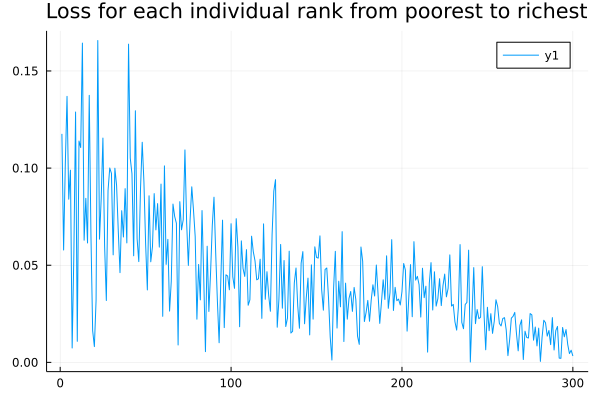

In [79]:
p1=plot(Utility_loss, title="Loss for each individual rank from poorest to richest")
savefig(p1, "Utility_loss.png") # save the most recent fig as filename_string (such as "output.png")
p1

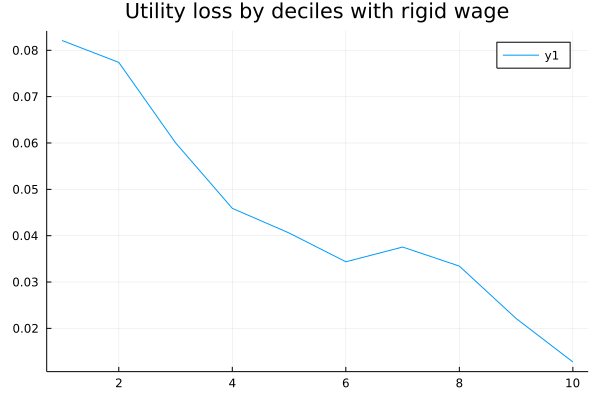

In [80]:
na=30
decile=10
dec=reshape(Utility_loss,(na,decile))
dec=mean(dec,dims=1)
dec=transpose(dec)

p2=plot(dec, title="Utility loss by deciles with rigid wage")
savefig(p2, "Utility_loss_deciles.png") # save the most recent fig as filename_string (such as "output.png")
p2